In [25]:
 #import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statistics
import statsmodels.api as statsmodels

    
df = pd.read_csv (r'C:\Users\tetia\Downloads\yrbss_samp.csv') #read file with data
df = df.dropna(subset = ['physically_active_7d', 'strength_training_7d']) #clean rows that will be used in case there 
                                                                        #are missing values
df.head()  #show the top 5 rows of the datast

,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep
0,16.0,female,11.0,not,Black or African American,1.50,52.62,never,1-2,0,4,0,8
1,17.0,male,11.0,not,White,1.78,74.84,rarely,0,7,1,5,7
2,17.0,male,11.0,not,White,1.75,106.60,never,0,7,2,0,7
3,15.0,male,10.0,hispanic,NaN,1.68,66.68,never,did not drive,3,2,1,5
4,18.0,male,12.0,not,Black or African American,1.70,80.29,never,did not drive,0,2,2,6


In [30]:
ny = len(df['physically_active_7d'])  #size of the sample (number of elements which is the same as length of the list)
meany = sum(df['physically_active_7d'])/ny #sum of the elements in the sample devided by the number of elements to get an average
modey = statistics.mode(df['physically_active_7d']) #the most popular value 
mediany = df['physically_active_7d'].median()
stdy = statistics.stdev(df['physically_active_7d'])#standard deviation of the sample(this function calculates it with n-1 in denominator)


print('stats for dependent y: n = {}, mean = {}, mode = {}, median = {}, std = {}'.format(ny,meany,modey,mediany,round(stdy,2)))

nx = len(df['strength_training_7d'])  #size of the sample (number of elements which is the same as length of the list)
meanx = sum(df['strength_training_7d'])/ny #sum of the elements in the sample devided by the number of elements to get an average
modex = statistics.mode(df['strength_training_7d']) #the most popular value 
medianx = df['strength_training_7d'].median()
stdx = statistics.stdev(df['strength_training_7d'])#standard deviation of the sample(this function calculates it with n-1 in denominator)


print('stats for independent x: n = {}, mean = {}, mode = {}, median = {}, std = {}'.format(nx,meanx,modex,medianx,round(stdx,2)))


stats for dependent y: n = 100, mean = 3.75, mode = 7, median = 4.0, std = 2.56
stats for independent x: n = 100, mean = 2.78, mode = 0, median = 2.5, std = 2.58


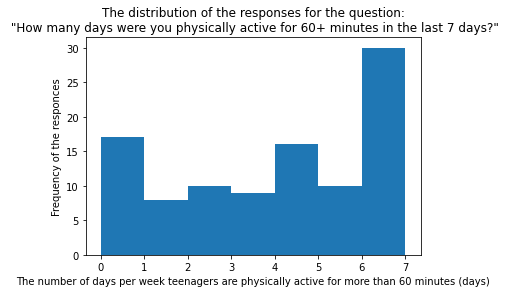

In [17]:
plt.hist(df['physically_active_7d'],bins = 7)
plt.xlabel('The number of days per week teenagers are physically active for more than 60 minutes (days)')
plt.ylabel('Frequency of the responces')
plt.title('The distribution of the responses for the question:\n "How many days were you physically active for 60+ minutes in the last 7 days?"')
plt.show()

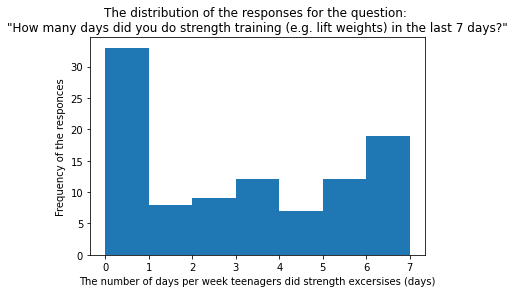

In [18]:
plt.hist(df['strength_training_7d'],bins = 7)
plt.xlabel('The number of days per week teenagers did strength excersises (days)')
plt.ylabel('Frequency of the responces')
plt.title('The distribution of the responses for the question: \n"How many days did you do strength training (e.g. lift weights) in the last 7 days?"')
plt.show()

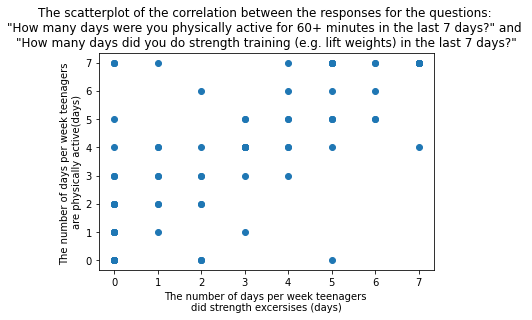

In [23]:
plt.scatter( df['strength_training_7d'], df['physically_active_7d'])
plt.ylabel('The number of days per week teenagers \nare physically active(days)')
plt.xlabel('The number of days per week teenagers \ndid strength excersises (days)')
plt.title('The scatterplot of the correlation between the responses for the questions: \n"How many days were you physically active for 60+ minutes in the last 7 days?" and \n"How many days did you do strength training (e.g. lift weights) in the last 7 days?"')
plt.show()


In [24]:
active_list = df['physically_active_7d'].tolist() #convert dataframe to to list
strong_list = df['strength_training_7d'].tolist()


stats.pearsonr(strong_list ,active_list) #use function to salculate correlation coefficient 

(0.7324358559228007, 4.730879238529133e-18)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     physically_active_7d   R-squared:                       0.536
Model:                              OLS   Adj. R-squared:                  0.532
Method:                   Least Squares   F-statistic:                     113.4
Date:                  Mon, 24 Jan 2022   Prob (F-statistic):           4.73e-18
Time:                          10:29:09   Log-Likelihood:                -196.79
No. Observations:                   100   AIC:                             397.6
Df Residuals:                        98   BIC:                             402.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7300      0.258      6.705      0.000       1.218       2.242
strength_training_7d     0.7266      0.068     10.650      0.000       0.591       0.862
==============================================================================
Omnibus:                       12.769   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.764
Skew:                           0.535   Prob(JB):                     3.10e-05
Kurtosis:                       4.959   Cond. No.                         5.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

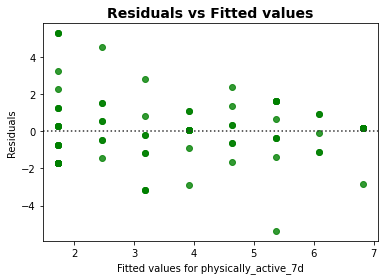

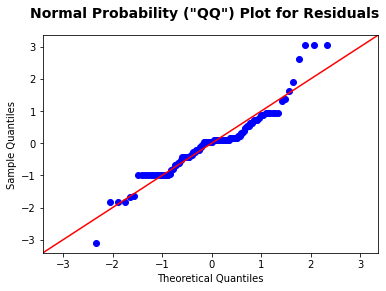

In [26]:
def mult_regression(column_x, column_y): #define the function for regression line calculation 
    if len(column_x)==1:  # If there is only one predictor variable, plot the regression line
        plt.figure() #plot figure 
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')
    
    # define independent X and dependent Y:
    X = df['strength_training_7d']
    X = statsmodels.add_constant(X)
    Y = df['physically_active_7d']
    
    # construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    
mult_regression(df['strength_training_7d'],'physically_active_7d')
regressionmodel.summary()

In [27]:
r = 0.73 #correlation coefficient 

b1 = r*stdy/stdx # the formula for the point-estimate for the slope
SE = stdy/stdx*((1-r**2)/(nx-2))**0.5# formula with the standard error
t = stats.t.ppf(0.975,nx-2) # calculate conficence intervals

lower_bound = b1 - t*SE #define the lower bound 
upper_bound = b1 + t*SE #define the upper bound

print("b1 =",b1, "\nSE =",SE, "\nt =",t, "\ninterval =", [lower_bound,upper_bound])

b1 = 0.7241949938579935 
SE = 0.06848958804854584 
t = 1.984467454426692 
interval = [0.5882796354085629, 0.860110352307424]
